# Project Title - Netflix Data Analysis Using Python

**The dataset consists of meta details about the movies and tv shows such as the title, director, and cast of the shows / movies. Details such as the release year, the rating, duration etc. As the first step, let's load the dataset, create some new features. In this kernel, I have analysed this dataset to find top insights and findings.

download dataset from here - https://www.kaggle.com/datasets/shivamb/netflix-shows?datasetId=434238&searchQuery=python**

## Downloading the Dataset


In [1]:
project_name = "netflix-shows-data-analysis" # change this (use lowercase letters and hyphens only)

## Data Preparation and Cleaning

**It is important to handle missing data because any statistical results based on a dataset with non-random missing values could be biased. So you really want to see if these are random or non-random missing values.**

Drop the columns which has high number of missing values.

We can impute(filling the missing values using the available information such as mean, median) but we should carefully see the pattern of the column before doing imputation.

For example - You want to fill the height of a person who male. Simpley adding 0 in the missing column would not make sense. So we can take the averega of male height and use that value inplace of missing values.



### Quick Dataset Overview

In [2]:
import pandas as pd
data = pd.read_csv("/Users/virus/Desktop/DataAnalysis/projects/EDA_Netflix/netflix_titles.csv")

In [3]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
data.shape

(8807, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Identify Missing Data

In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Dealing with Missing Data

There are different ways of dealing with missing data. The correct approach to handling missing data will be highly influenced by the data and goals your project has.

#### Replace it by the mean, median or mode

common approach is to use the mean, median or mode to replace the empty values. The mean and median are used to replace numeric data, while the mode replaces categorical data.

In [8]:
mode = ''.join(data['rating'].mode())
data['rating'].fillna(mode, inplace=True)

In [9]:
mode

'TV-MA'

In [10]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
data['duration'].fillna(0, inplace=True)

In [12]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

### Remove Duplicates 

In [13]:
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


As there is no duplicate entry then we do not have to do any thing.

## Exploratory Analysis and Visualization


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Number of TV Shows vs Movies**

<AxesSubplot:xlabel='type', ylabel='count'>

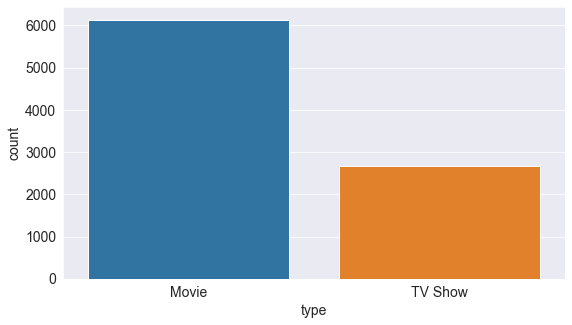

In [15]:
sns.countplot(x='type', data=data)

As shown, the number of movies more then doubles the number of TV shows in our dataset

**Ratings of TV shows compares to Movies**

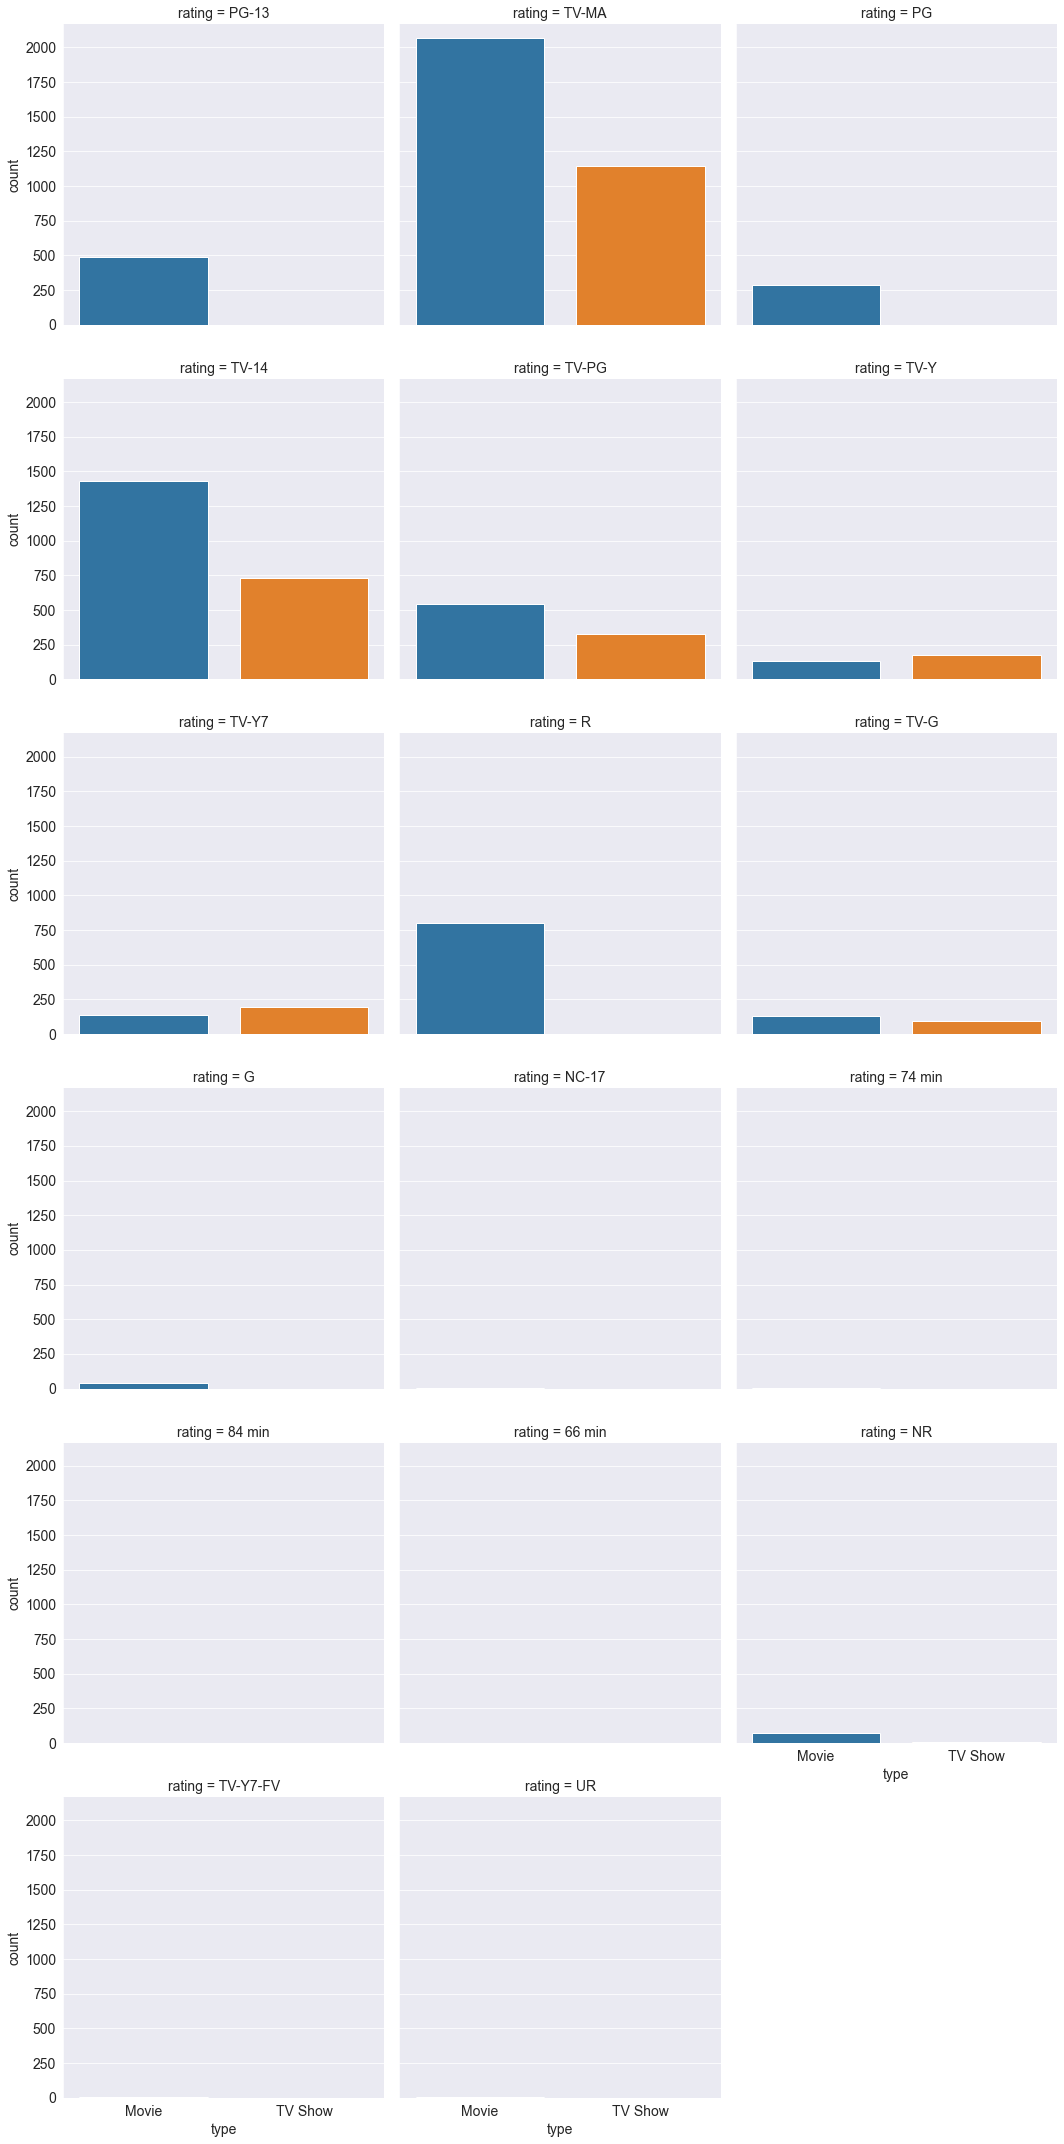

In [16]:
sns.catplot(x="type", col="rating", kind="count", col_wrap=3, data=data)

<AxesSubplot:xlabel='rating', ylabel='count'>

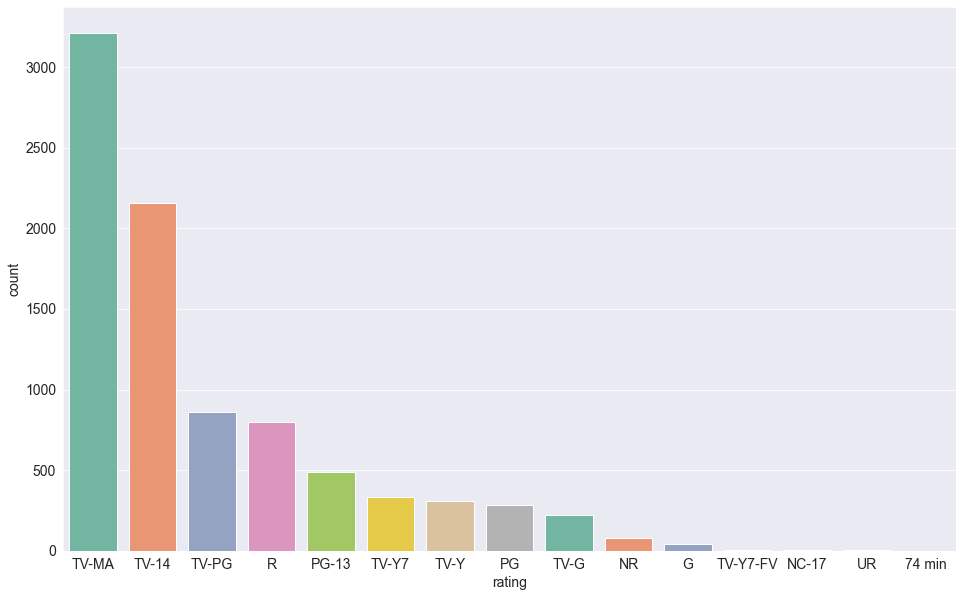

In [17]:
plt.figure(figsize=(16,10))
sns.countplot(x="rating", data=data, palette="Set2", order=data['rating'].value_counts().index[0:15])

**Top 10 countries with the highest number of releases**

<AxesSubplot:ylabel='Number of Releases'>

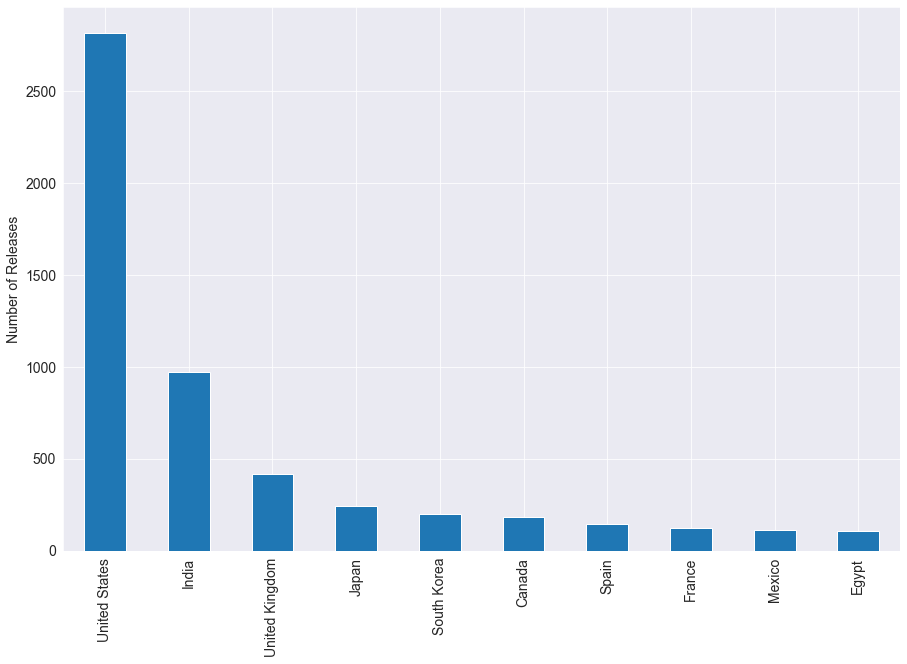

In [18]:
plt.figure(figsize=(15,10))
plt.ylabel("Number of Releases")
data['country'].value_counts().nlargest(10).plot.bar()

As shown, US leads the number of releases by a large margin, followed by India and the UK.
It would be interesting to see the proportion of TV show VS Movie releases amongst these countries. Lets put a hue on 'type' on this graph to show this

**TV show VS Movie releases amongst these countries**

Text(0, 0.5, 'Number of Releases')

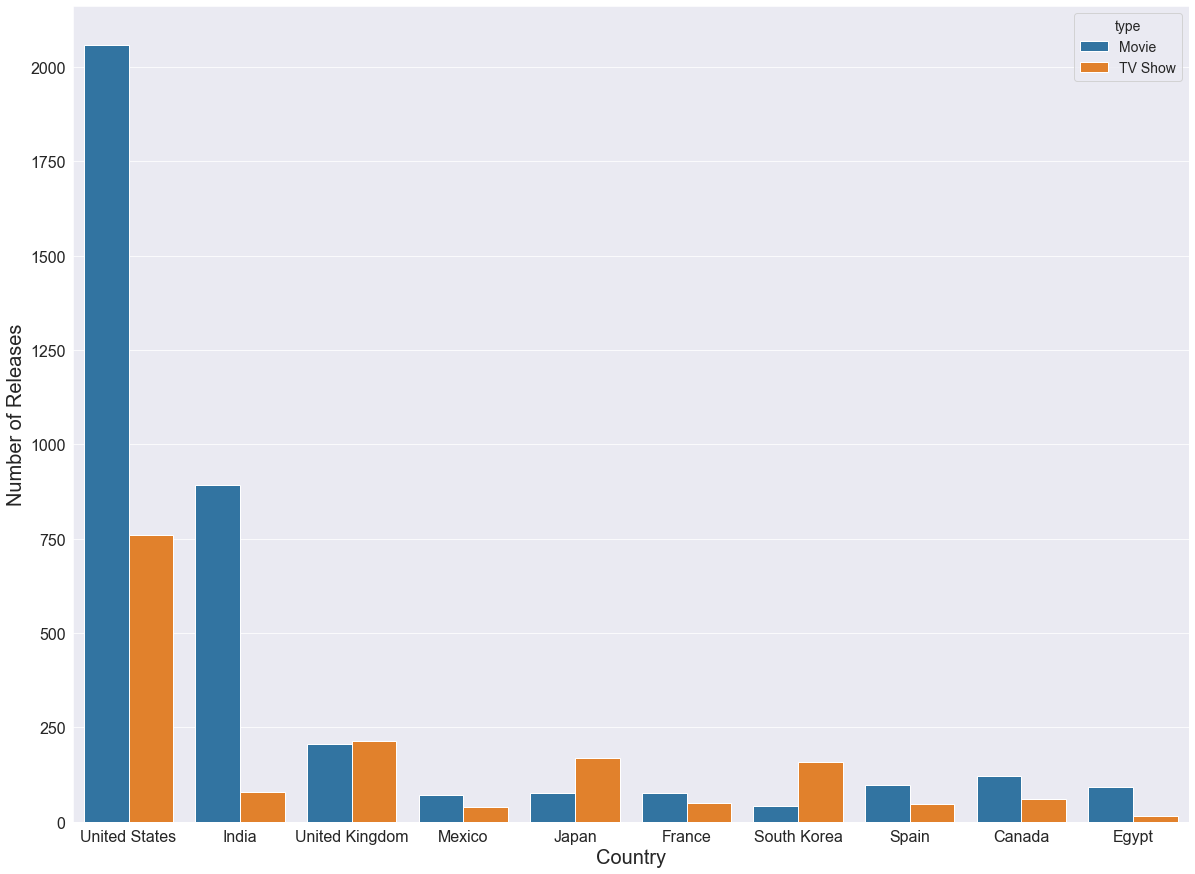

In [19]:
top10 = data['country'].value_counts().nlargest(10)
plt.figure(figsize=(20,15))
df = data[data['country'].isin(top10.index)]
sns.countplot(x='country', hue='type', data=df)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Number of Releases", fontsize=20)

Some interesting observation here is India as we can see there is a high difference in TV series and Movies there
it may be due indian cinema. And also one more very intersting observation is, In Country Japan and South Korea TV 
series are more realeased as compare to Movies as this might be due to korean drama are more famous and for japan 
the anime industry is huge.

**Average length of movies amongst these countries**

In [20]:
from numpy import mean

Text(0, 0.5, 'Average Movie Length (Min)')

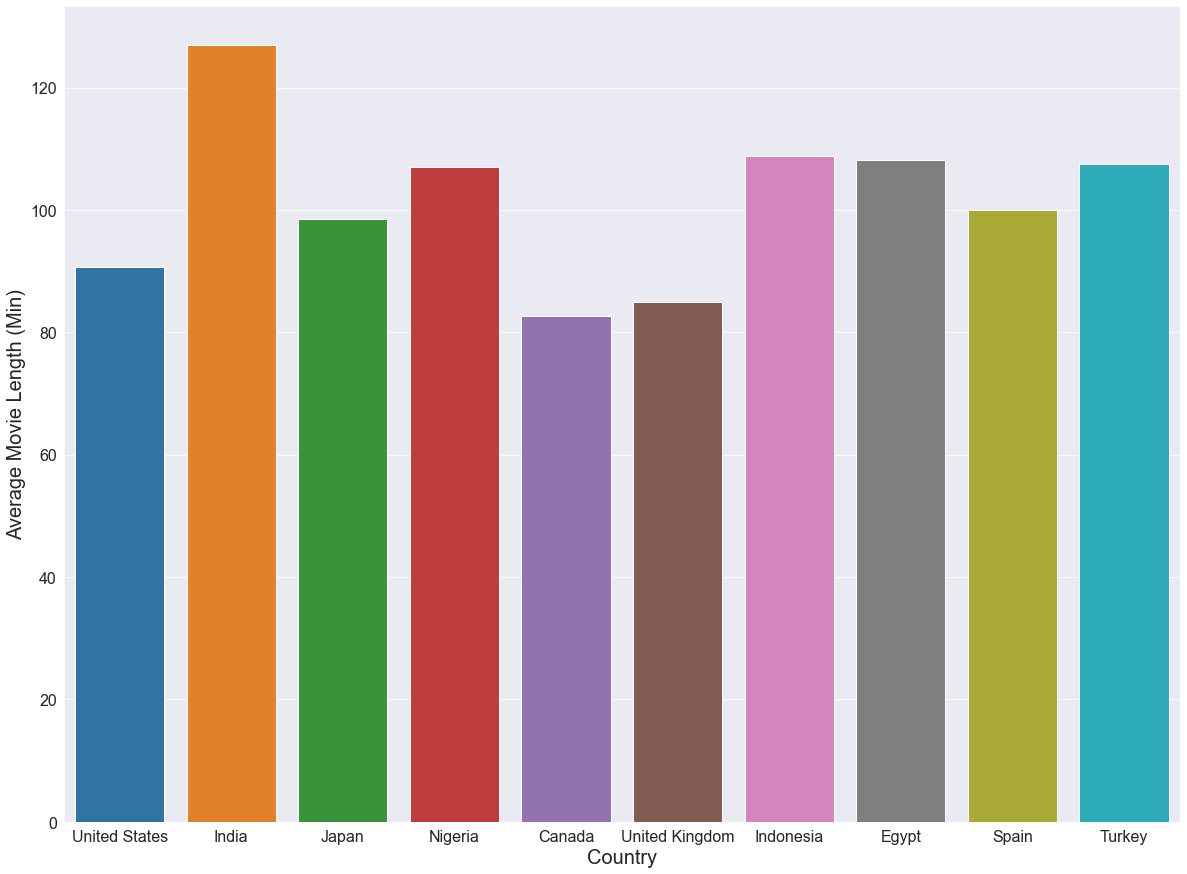

In [21]:
plt.figure(figsize=(20,15))
df = data.loc[data['type'] == 'Movie']
top10 = df['country'].value_counts().nlargest(10)
df = df[df['country'].isin(top10.index)]
df['duration'] = df['duration'].str.strip('min')
df['duration'] = pd.to_numeric(df['duration'])
sns.barplot(x='country', y='duration', estimator=mean, data=df, ci=False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Average Movie Length (Min)", fontsize=20)

Not only does India have a disproportionately large number of Movie releases, 
the average length of the movies is also higher than any other country.

## Asking and Answering Questions




#### Q1: Get all the information of 'Naruto' and 'Demon Slayer' TV shows.

**isin()**

In [22]:
data[data['title'].isin(['Naruto'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3541,s3542,TV Show,Naruto,Hayato Date,"Junko Takeuchi, Chie Nakamura, Noriaki Sugiyam...",Japan,"September 1, 2019",2006,TV-14,9 Seasons,"Anime Series, International TV Shows","Guided by the spirit demon within him, orphane..."


**str.contains()**

In [23]:
data[data['title'].str.contains('Demon Slayer')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1385,s1386,TV Show,Demon Slayer: Kimetsu no Yaiba,NaN,"Natsuki Hanae, Akari Kito, Hiro Shimono, Yoshi...",Japan,"January 22, 2021",2019,TV-14,1 Season,"Anime Series, International TV Shows",After a demon attack leaves his family slain a...


#### Q2: In which year highest number of TV shows and Movies are added? Show with bar graph.

**dtypes**

In [24]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**to_datetime**

In [25]:
data["Date_N"] = pd.to_datetime(data['date_added'])

In [26]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


In [27]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
Date_N          datetime64[ns]
dtype: object

**dt.year.value_counts()** - It counts the occurrence of all individual Year in Date Column.

In [28]:
data['Date_N'].dt.year.value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: Date_N, dtype: int64

**bar graph**

<AxesSubplot:>

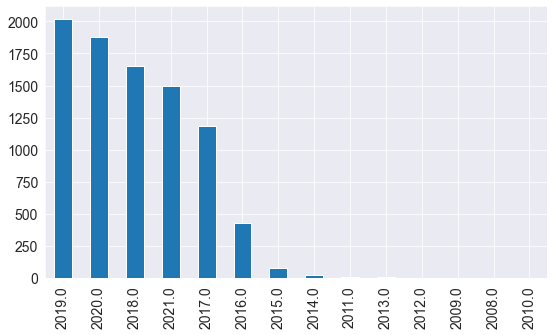

In [29]:
data['Date_N'].dt.year.value_counts().plot(kind='bar')

#### Q3: Show only those titles of the TV shows that release in India only.

In [30]:
data.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N
4810,s4811,Movie,Penalty Kick,Rodrigo Triana,"Adrián Uribe, Julieth Restrepo, Carlos Manuel ...","Colombia, Mexico","June 29, 2018",2018,TV-14,89 min,"Comedies, Dramas, International Movies",Convinced Mexico will lose the World Cup quali...,2018-06-29


In [31]:
data[(data['type']=='TV Show') & (data['country']=='India')]['title']

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

#### Q4: Show Top 10 directors, who gave the highest number of TV shows and Movies to Netflix.

<AxesSubplot:>

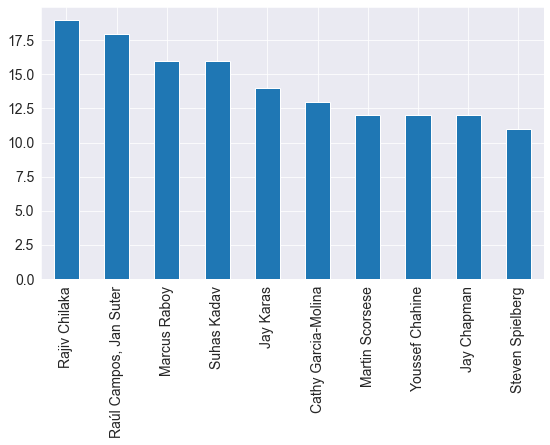

In [32]:
data['director'].value_counts().head(10).plot(kind='bar')

#### Q5: Top 20 Genres on Netflix

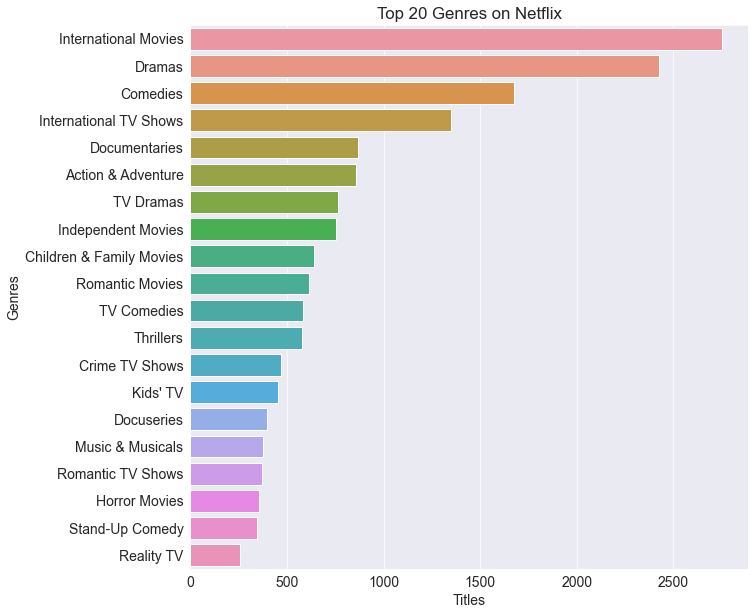

In [33]:
filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

## Inferences and Conclusion


It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.

## References and Future Work


Link of dataset - https://www.kaggle.com/datasets/shivamb/netflix-shows, 

We did exploratory data analysis on Netflix Data. We found a lot of insights from the data. This is the first step in our series.

Next, we will engineer useful features and begin developing our recommendation model.

For modelling step, we will start with the rating data from here : https://www.kaggle.com/netflix-inc/netflix-prize-data . Then we will see if the extended movie features from this dataset helps to improve our recommendation system.

we also do IMDB Ratings Analysis on Netflix Movies & TV Shows in future.

Stay tuned!